Import the necessary libraries:

In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Mount Drive

In [28]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load and convert the image to the appropriate color space:

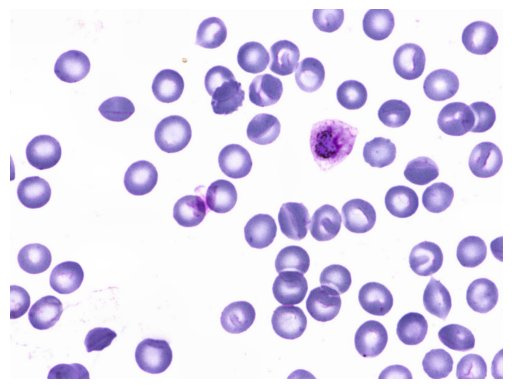

In [29]:
image = cv2.imread('/content/drive/Shareddrives/ACM Research Lab/Explainable CNN for Medical Project/data/CoolMalariaBox/malaria/images/train/Malaria/002f20ad-2ace-499c-9335-c9080bc3e6b5.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB color space
plt.imshow(image)
plt.axis('off')  # Turn off axes
plt.show()

Define the lower and upper bounds of the purple color in the HSV color space:

In [30]:
lower_purple = np.array([130, 50, 50])    # Adjust these values to suit your specific shade of purple
upper_purple = np.array([170, 255, 255])


In [31]:
hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)    # Convert to HSV color space
mask = cv2.inRange(hsv_image, lower_purple, upper_purple)    # Create binary mask


Perform color thresholding to obtain a binary mask of the purple regions:

In [32]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))    # Define a kernel for morphological operations
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)    # Closing operation to fill small gaps
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)    # Opening operation to remove noise


Apply morphological operations to enhance the mask:

In [33]:
result = cv2.bitwise_and(image, image, mask=mask)


Apply the mask to the original image to extract the purple regions:

(1200, 1600, 3)
uint8


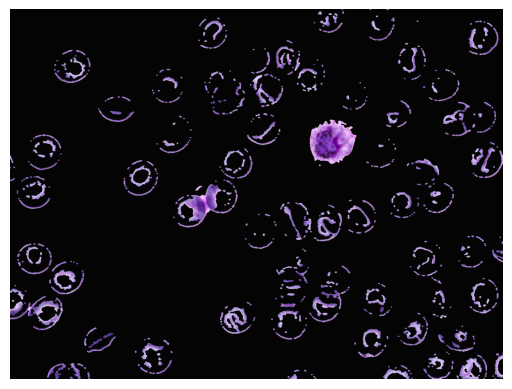

In [34]:
# Example: Increase contrast using CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0)    # Adjust clipLimit for desired enhancement

print(result.shape)    # Print the shape of the image
print(result.dtype)    # Print the data type of the image

# Convert the result image to LAB color space
lab_image = cv2.cvtColor(result, cv2.COLOR_RGB2LAB)

# Split the LAB image into L, A, and B channels
l_channel, a_channel, b_channel = cv2.split(lab_image)

# Apply CLAHE only on the L channel (grayscale)
clahe = cv2.createCLAHE(clipLimit=2.0)
l_channel_enhanced = clahe.apply(l_channel)

# Merge the enhanced L channel with the original A and B channels
lab_image_enhanced = cv2.merge((l_channel_enhanced, a_channel, b_channel))

# Convert the enhanced LAB image back to RGB color space
result_enhanced = cv2.cvtColor(lab_image_enhanced, cv2.COLOR_LAB2RGB)

# Display the enhanced image
plt.imshow(result_enhanced)
plt.axis('off')
plt.show()


#result = clahe.apply(result_enhanced)


In [35]:
#cv2.imwrite('processed_image.jpg', result)
